In [ ]:
# Start writing code here...
import pandas as pd
import numpy as np
import yfinance as yf
import math

In [ ]:
from collections import namedtuple
from operator    import itemgetter

def ema(serie, period):
    return serie.ewm(span=period,adjust=True).mean()
    

In [ ]:
sectors = ["XLE", "XLF", "XLI", "XLU", "XLK", "XLV", "XLY", "XLP", "XLB", "XLRE", "XLC"]

In [ ]:
data = {}
for s in sectors:
    tickers = yf.Ticker(s)
    data[s] = tickers.history(period = "2y")

<AxesSubplot:xlabel='Date'>

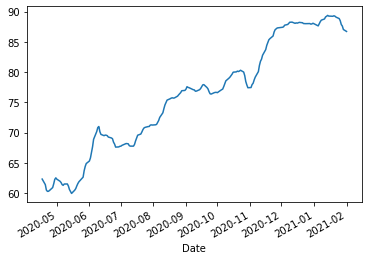

In [ ]:
ema(data['XLI'].Close[-200:], 9).plot()

In [ ]:
def PFE(serie):
    pfe = (pow(serie-serie.shift(9), 2)+100).apply(lambda x : math.sqrt(x))
    c2c = (pow(serie.shift(1)-serie, 2)+1).apply(lambda x : math.sqrt(x)).rolling(9).sum()
    return ema(round(np.sign(serie-serie.shift(9)) * pfe/c2c*100,0),9)
    


<AxesSubplot:xlabel='Date'>

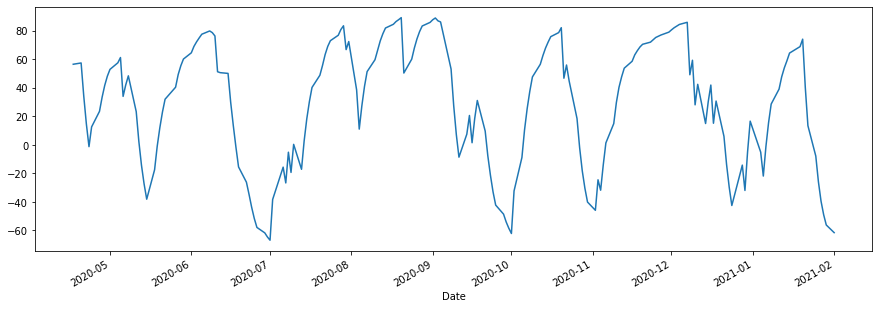

In [ ]:
PFE(data['XLI'].Close)[-200:].plot(figsize=(15,5))

In [ ]:
data['XLB'].tail()

In [ ]:
data['XLB'].Close.pct_change()

Date
2019-02-01         NaN
2019-02-04   -0.001682
2019-02-05    0.007301
2019-02-06   -0.005947
2019-02-07   -0.013834
                ...   
2021-01-26   -0.013786
2021-01-27   -0.029464
2021-01-28    0.017227
2021-01-29   -0.019434
2021-02-01    0.005804
Name: Close, Length: 504, dtype: float64

In [ ]:
ser = data['XLB'].Close.pct_change()-data['XLI'].Close.pct_change()

<AxesSubplot:xlabel='Date'>

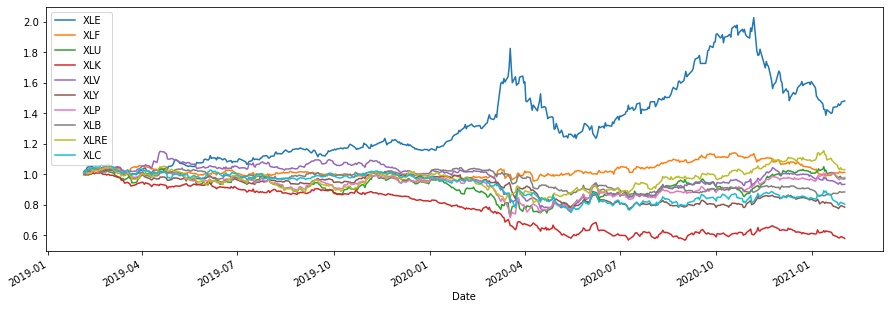

In [ ]:
for sr in sectors:
    for s in sectors:
        if s != sr:
            ser = data[sr].Close.pct_change()-data[s].Close.pct_change()
            data[sr][s] = (ser+1).cumprod()
            data[sr][f"PFE_{s}"] = PFE(data[sr][s])

data['XLI'][[s for s in sectors if s != 'XLI']].plot(figsize=(15,5))

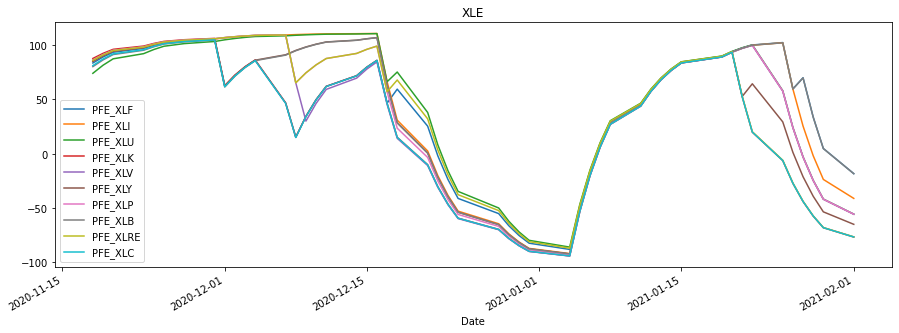

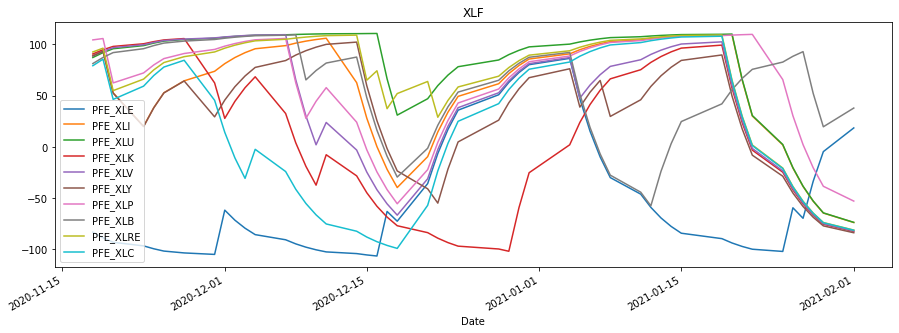

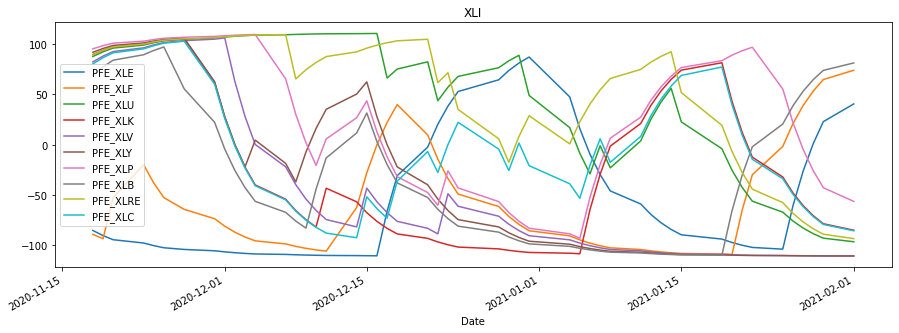

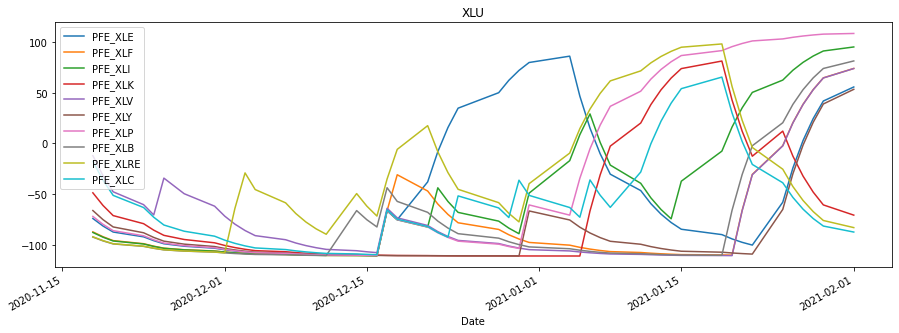

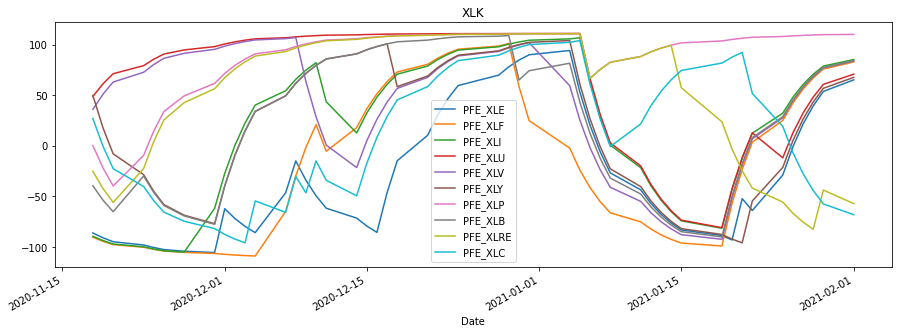

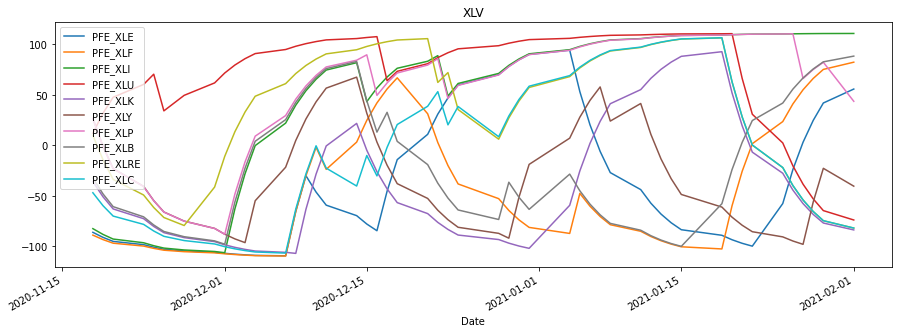

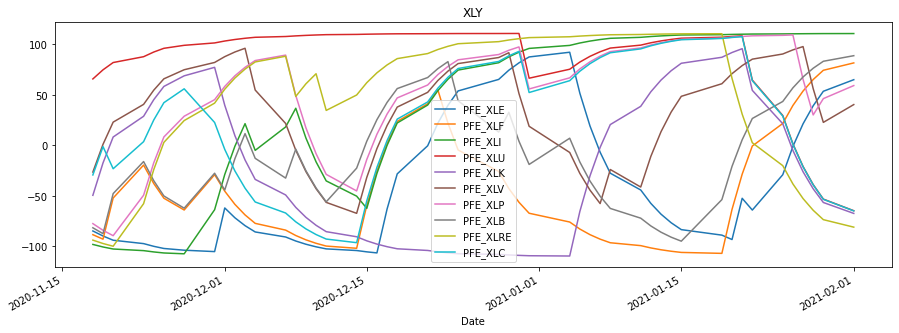

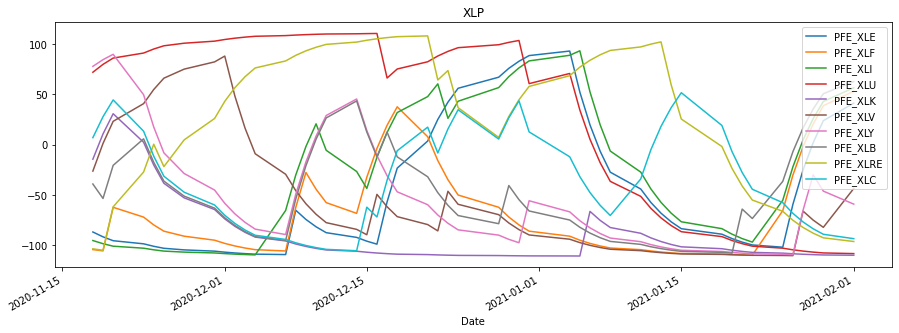

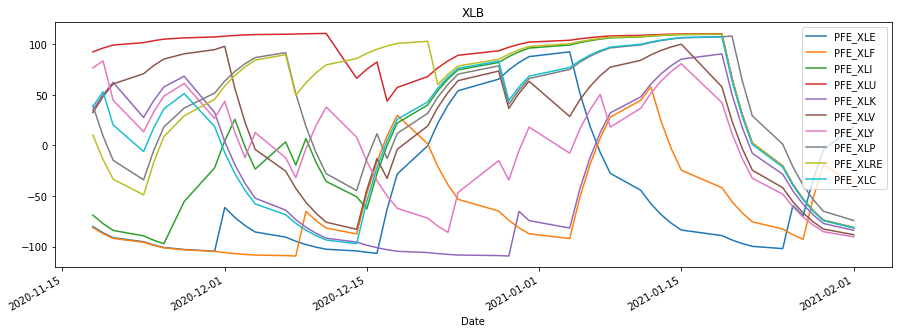

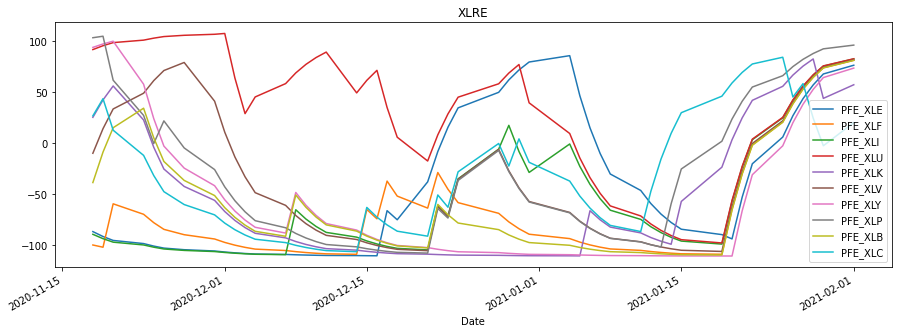

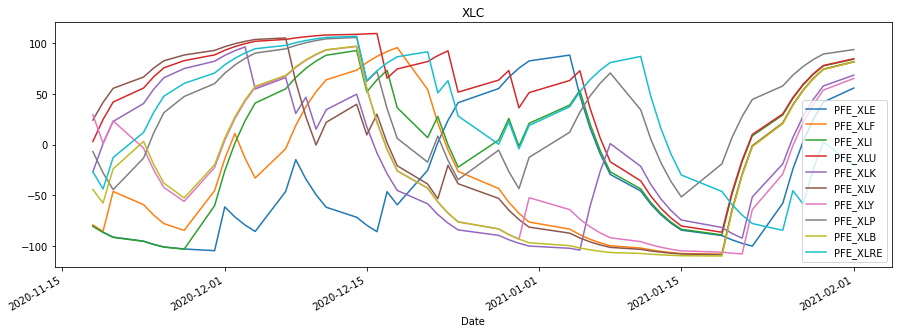

In [ ]:
for sr in sectors:
    data[sr][[f"PFE_{s}" for s in sectors if s != sr]][-50:].plot(title=sr,figsize=(15,5))

<AxesSubplot:xlabel='Date'>

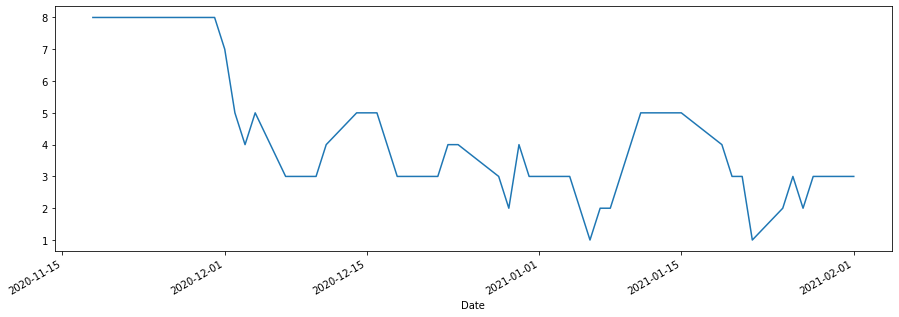

In [ ]:
(data['XLI'][[f"PFE_{s}" for s in sectors if s != 'XLI']]>0).sum(axis=1)[-50:].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

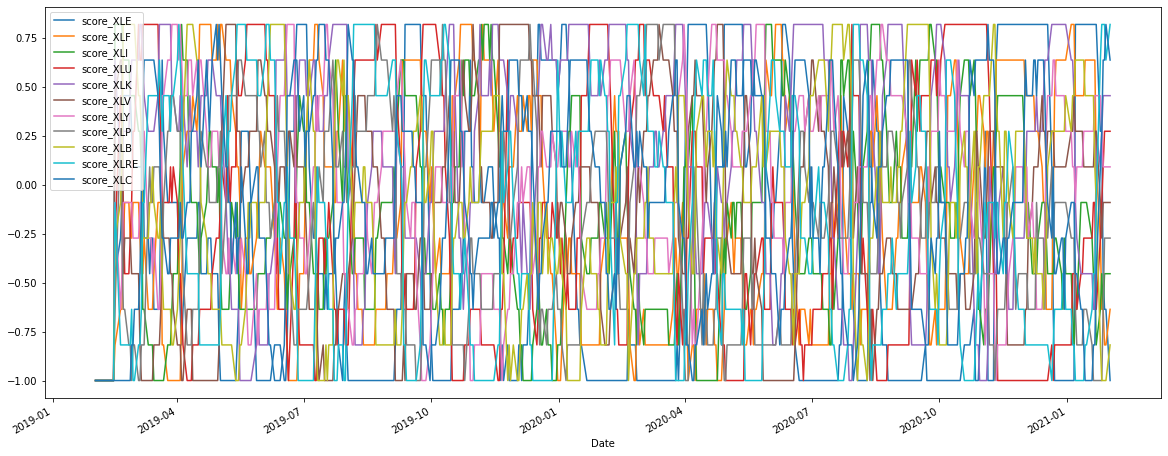

In [ ]:
mid = len(sectors)  * 0.5
for sr in sectors:
    data['XLI'][f"score_{sr}"] = ((data[sr][[f"PFE_{s}" for s in sectors if s != sr]]>0).sum(axis=1)-mid)/mid

data['XLI'][[f"score_{s}" for s in sectors ]].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

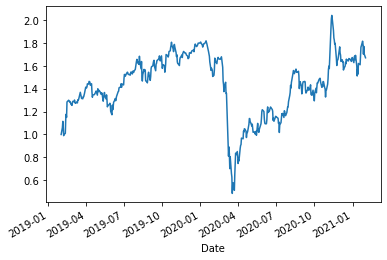

In [ ]:
for sr in sectors:
    data['XLI'][f"pct_{sr}"] = data[sr].Close.pct_change()*-data['XLI'][f"score_{sr}"].shift(1)

((data['XLI'][[f"pct_{s}" for s in sectors]]).sum(axis=1)+1).cumprod().plot()